Estudos sobre o dataframe "Churn_Modelling.csv" retirado do Kaggle.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv("Churn_Modelling.csv", index_col=0)

Bloco 1: Análise Inicial e Limpeza (O "Check-up" dos Dados). O objetivo aqui é sentir o formato e a saúde geral dos seus dados.

Estrutura Básica:

1) Quantas linhas (clientes) e colunas (variáveis) o conjunto de dados possui?

In [15]:
print(df.shape)

(10002, 13)


2. Quais são os tipos de dados de cada coluna (número, texto, etc.)?

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


3. Existem colunas que parecem ser apenas identificadores e que não devem ser usadas em análises, como RowNumber, CustomerId e Surname

Sim: CustomerId e Surname.

4. Existem valores ausentes (nulos) em alguma coluna? Se sim, em quais e quantos? Qual seria uma boa estratégia para lidar com eles?

In [19]:
print(df.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


Há 4 valores ausentes nesse dataset. A melhor estratégia, nesse caso, considerando que é um grande dataset e que há poucos dados ausentes, é excluir a linha, pois não irá impactar a análise ou desempenho de um modelo de ML. É um método seguro pois não iremos imputar dados, o que poderia introduzir um viés na análise. Apenas dados reais serão trabalhados nesse cenário. 

In [22]:
print(f'Número de linhas antes da remoção de dados ausentes: {len(df)}')

Número de linhas antes da remoção de dados ausentes: 10002


In [24]:
df_limpo = df.dropna()

In [25]:
print(f'Número de linhas após a remoção de dados ausentes: {len(df_limpo)}')

Número de linhas após a remoção de dados ausentes: 9998


In [26]:
print(df_limpo.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Existem linhas duplicadas no conjunto de dados?

In [33]:
print(df.duplicated().sum())

2


In [29]:
print(df[df.duplicated(keep=False)])


           CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
RowNumber                                                                       
9999         15682355  Sabbatini          772   Germany    Male  42.0       3   
9999         15682355  Sabbatini          772   Germany    Male  42.0       3   
10000        15628319     Walker          792    France  Female  28.0       4   
10000        15628319     Walker          792    France  Female  28.0       4   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
9999        75075.31              2        1.0             0.0   
9999        75075.31              2        1.0             0.0   
10000      130142.79              1        1.0             0.0   
10000      130142.79              1        1.0             0.0   

           EstimatedSalary  Exited  
RowNumber                           
9999              92888.52       1  
9999 

In [30]:
df_semduplicados = df.drop_duplicates()

In [32]:
print(df_semduplicados.duplicated().sum())

0


Olhando as estatísticas descritivas (df.describe()), há algo estranho? (Ex: idade negativa, CreditScore muito baixo ou muito alto, etc.).

In [34]:
print(df_semduplicados.describe())

         CustomerId   CreditScore          Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  9999.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800    38.923095      5.012800   76485.889288   
std    7.193619e+04     96.653299    10.487635      2.892174   62397.405202   
min    1.556570e+07    350.000000    18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000    32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000    37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000    44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000    92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  9999.000000     9999.000000     10000.000000   
mean        1.530200     0.705471        0.515052    100090.239881   
std         0.581654     0.455854        0.499798     57510.492818   
min     

Bloco 2: Análise Univariada (Analisando Uma Variável por Vez)
O objetivo é entender a distribuição e as características de cada variável individualmente.

Qual é a proporção de clientes que cancelaram a conta (Exited = 1) e que permaneceram (Exited = 0)?

In [40]:
df_semduplicados['Exited'] = df_semduplicados['Exited'].astype(str)

C:\Users\Pessoal\AppData\Local\Temp\ipykernel_1692\3086526871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semduplicados['Exited'] = df_semduplicados['Exited'].astype(str)


In [41]:
print(df_semduplicados['Exited'].dtype)


object


In [42]:
df_semduplicados['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

7.963 clientes permaneceram com a conta e 2.037 cancelaram.

O conjunto de dados está balanceado em relação à variável alvo? (Ou seja, há uma quantidade parecida de "sim" e "não"?).

 79.6% de clientes permaneceram e 20.4% cancelaram. Proporção de aproximadamente 80/20. Isso significa que, para cada cliente que cancelou, existem quase quatro que permaneceram.

O Que Significa "Balanceado"?
Um conjunto de dados perfeitamente balanceado teria uma proporção de 50/50 Geralmente, proporções até 60/40 ou 70/30 são consideradas levemente desbalanceadas, mas ainda manejáveis.

Uma proporção de 80/20 já é um desbalanceamento claro e que requer atenção. Proporções mais extremas (95/5, 99/1) são consideradas severamente desbalanceadas.

Por Que Isso é Importante? (A Consequência)
O fato de os dados serem desbalanceados tem uma implicação muito séria, principalmente se o seu objetivo for construir um modelo de Machine Learning para prever o churn (cancelamento).

O Risco: Um modelo treinado com esses dados pode ficar "preguiçoso" e aprender que a melhor estratégia para acertar na maioria das vezes é simplesmente prever que nenhum cliente vai cancelar. Se ele fizesse isso, ele teria uma precisão (acurácia) de 79.6%, o que parece bom, mas na prática o modelo seria completamente inútil, pois ele falharia em identificar o que é mais importante para o negócio: os clientes que estão prestes a sair.

O Que Fazer a Respeito?
Saber que seus dados são desbalanceados é o primeiro passo. Mais adiante, na fase de modelagem, existem técnicas específicas para lidar com isso, como:

Resampling: Técnicas como Oversampling (criar cópias sintéticas da classe minoritária, com o algoritmo SMOTE) ou Undersampling (reduzir o número de exemplos da classe majoritária).

Métricas de Avaliação Corretas: Em vez de usar apenas a acurácia, você deverá focar em métricas como Precisão, Recall, F1-Score e a Área Sob a Curva ROC (AUC), que dão uma visão melhor do desempenho do modelo em dados desbalanceados.

Ajuste de Pesos no Modelo: Muitos algoritmos permitem que você atribua um "peso" maior para os erros cometidos na classe minoritária, forçando o modelo a prestar mais atenção nela.

Quantos clientes existem em cada país (Geography)? Qual é o país mais representativo?

In [45]:
df_semduplicados['Geography'].value_counts()

Geography
France     5013
Germany    2509
Spain      2477
Name: count, dtype: int64

Qual é a distribuição entre homens e mulheres (Gender)?

In [47]:
df_semduplicados['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Qual a proporção de clientes que possuem cartão de crédito (HasCrCard)?

In [52]:
print(df_semduplicados['HasCrCard'].value_counts())
print(df_semduplicados['HasCrCard'].value_counts(normalize = True))


HasCrCard
1.0    7054
0.0    2945
Name: count, dtype: int64
HasCrCard
1.0    0.705471
0.0    0.294529
Name: proportion, dtype: float64


Qual a proporção de clientes que são membros ativos (IsActiveMember)?

In [53]:
df_semduplicados['IsActiveMember'].value_counts(normalize = True)

IsActiveMember
1.0    0.515052
0.0    0.484948
Name: proportion, dtype: float64

Qual é a distribuição de idade (Age) dos clientes? Crie um histograma para visualizar. Existe alguma faixa etária predominante?

In [54]:
df_semduplicados['Age'].describe()

count    9999.000000
mean       38.923095
std        10.487635
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

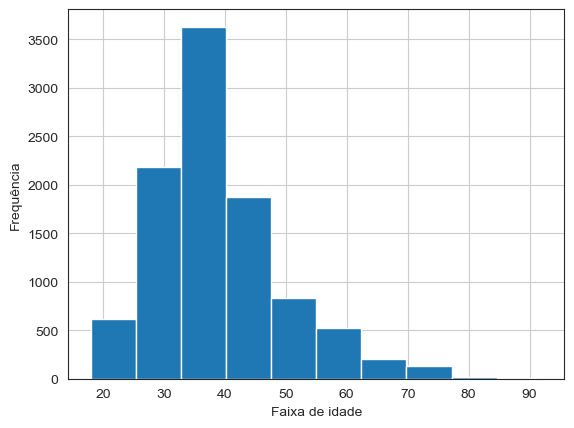

In [78]:
sns.set_style("white")
df_semduplicados['Age'].hist(bins=10)
plt.xlabel('Faixa de idade')
plt.ylabel('Frequência')
plt.show()

Há mais clientes na faixa etária de 35 a 40 anos. 

Como o saldo em conta (Balance) está distribuído? Existem muitos clientes com saldo zerado?

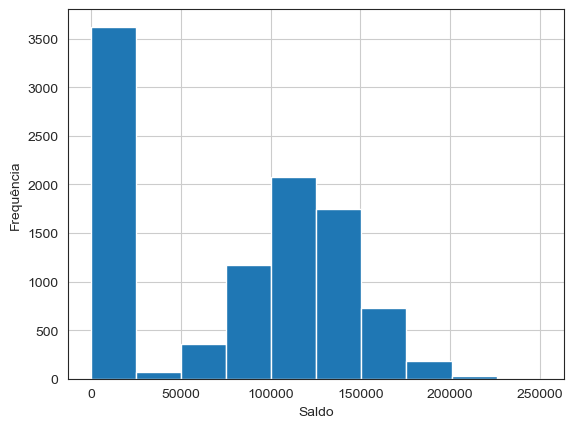

In [79]:
sns.set_style("white")
df_semduplicados['Balance'].hist(bins=10)
plt.xlabel('Saldo')
plt.ylabel('Frequência')
plt.show()

In [70]:
conta_zerada = (df_semduplicados['Balance'] == 0).sum()
print(conta_zerada)

3617


Qual é a distribuição do Escore de Crédito (CreditScore)? Ela se parece com uma distribuição normal (formato de sino)?

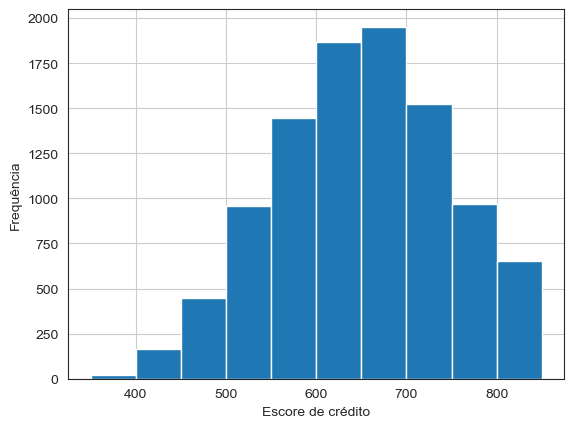

In [82]:
sns.set_style("white")
df_semduplicados['CreditScore'].hist(bins=10)
plt.xlabel("Escore de crédito")
plt.ylabel("Frequência")
plt.show()

Os clientes costumam ter quantos produtos (NumOfProducts)?

In [83]:
df_semduplicados['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

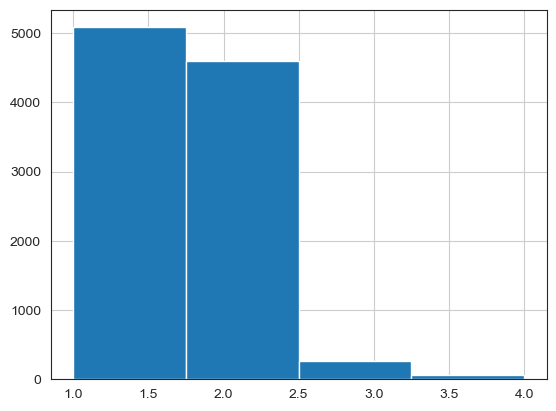

In [87]:
sns.set_style("white")
df_semduplicados['NumOfProducts'].hist(bins=4)
plt.show()

A variável tempo de vínculo com o banco (Tenure) tem uma distribuição uniforme?

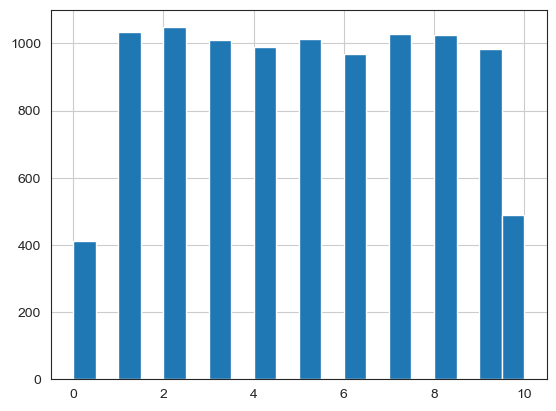

In [89]:
sns.set_style("white")
df_semduplicados['Tenure'].hist(bins=20)
plt.show()

A taxa de churn varia entre os países (Geography)? Qual país tem a maior taxa de cancelamento?

In [104]:
churn_paises = df_semduplicados.groupby('Geography')['Exited'].value_counts(normalize=True)
print(churn_paises)

Geography  Exited
France     0         0.838420
           1         0.161580
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: proportion, dtype: float64


Sim, há variação da taxa de cancelamento da conta entre os 3 países. A Alemanha é o pais com maior taxa de cancelamento, já França e Espanha possuem a mesma taxa de cancelamento. 

Existe diferença na taxa de churn entre homens e mulheres (Gender)?

In [107]:
churn_genero = df_semduplicados.groupby('Gender')['Exited'].value_counts(normalize=True)
print(churn_genero)

Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: proportion, dtype: float64


Sim, existe diferença. As mulheres cancelam mais que os homens. 

Clientes com maior CreditScore tendem a cancelar menos? (Use um boxplot para comparar a distribuição de CreditScore para quem saiu e quem ficou).

In [ ]:
churn_credit_score = df_semduplicados.groupby('Exited')['CreditScore'].mean()
print(churn_credit_score)


Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


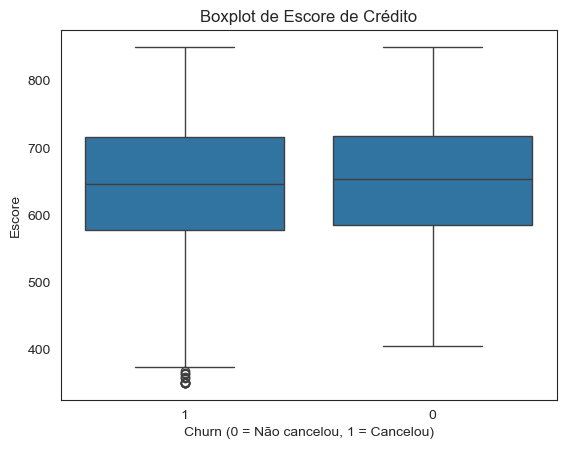

In [113]:

sns.boxplot(x='Exited', y='CreditScore', data=df_semduplicados)
plt.title('Boxplot de Escore de Crédito')
plt.xlabel('Churn (0 = Não cancelou, 1 = Cancelou)')
plt.ylabel('Escore')
plt.show()

Não há grandes diferenças entre o cancelamento e o escore de crédito. 

Existe uma faixa de idade (Age) que tem uma propensão maior a cancelar a conta?

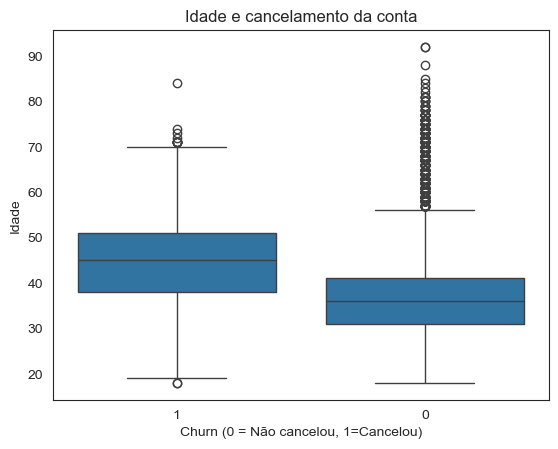

In [114]:
sns.boxplot(x='Exited', y='Age', data=df_semduplicados)
plt.title("Idade e cancelamento da conta")
plt.xlabel("Churn (0 = Não cancelou, 1=Cancelou)")
plt.ylabel("Idade")
plt.show()

Clientes na faixa de idade entre 40 e 50 anos cancelam mais que os que têm entre 30 a 40 anos. 

Clientes com saldo (Balance) muito alto ou muito baixo cancelam mais?

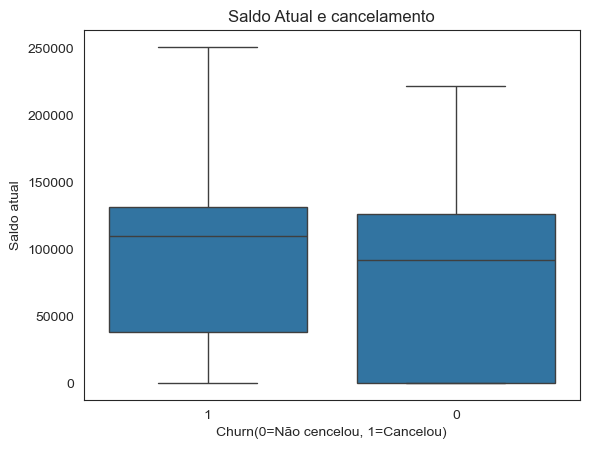

In [118]:
sns.set_style("white")
sns.boxplot(x='Exited', y ='Balance', data=df_semduplicados)
plt.title("Saldo Atual e cancelamento")
plt.xlabel("Churn(0=Não cencelou, 1=Cancelou)")
plt.ylabel("Saldo atual")
plt.show()

A análise do boxplot mostra que não há uma relação clara entre saldos muito baixos e a taxa de cancelamento. No entanto, a distribuição do saldo para clientes que cancelaram a conta está significativamente concentrada em valores mais altos. A mediana do saldo é maior para o grupo que cancelou, indicando que clientes com saldos mais elevados tendem a ter uma taxa de cancelamento maior.

Ser um membro ativo (IsActiveMember) tem um impacto significativo na retenção de clientes?

In [121]:
df_semduplicados.groupby("IsActiveMember")['Exited'].value_counts(normalize=True)

IsActiveMember  Exited
0.0             0         0.731491
                1         0.268509
1.0             0         0.857282
                1         0.142718
Name: proportion, dtype: float64

Sim. É possível perceber que a taxa de cancelamento entre os que são inativos é aproximadente o dobro do que entre os que cancelaram e eram ativos (26% x 14%).

O número de produtos (NumOfProducts) que um cliente possui influencia sua decisão de sair? E o tempo de contrato (Tenure)?

In [123]:
df_semduplicados.groupby('NumOfProducts')['Exited'].value_counts(normalize=True)

NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: proportion, dtype: float64

Sim. O número de produtos influencia a decisão de sair. A taxa de churn foi maior entre os que tinham 3 ou 4 produtos na carteira. Entao, ter mais de 2 produtos aumenta a chance de cancelar a conta. 

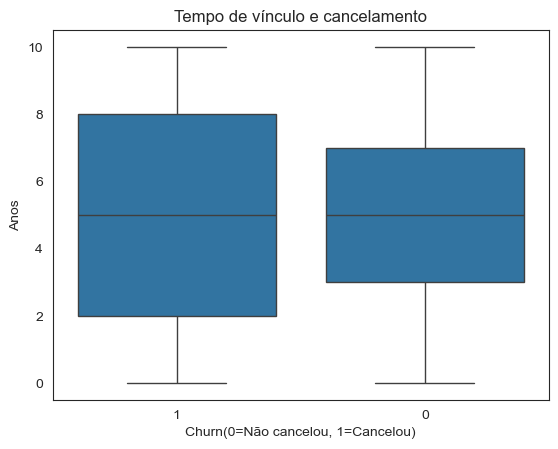

In [126]:
sns.set_style("white")
sns.boxplot(x='Exited', y ='Tenure', data=df_semduplicados)
plt.title("Tempo de vínculo e cancelamento")
plt.xlabel("Churn(0=Não cancelou, 1=Cancelou)")
plt.ylabel("Anos")
plt.show()

Não há uma tendência clara de que clientes mais novos ou mais antigos cancelem mais.

Baseado em suas análises, você consegue montar um "perfil" do cliente com maior probabilidade de cancelar a conta? (Ex: "Clientes da Alemanha, com idade entre 40-50 anos, com 2 produtos...").

O cliente com maior probabilidade de cancelar a conta tem entre 40 e 50 anos, possui mais de 2 produtos na carteira, é um cliente inativo, reside na Alemanha. 